In [1]:
# Import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Part 1: Data cleaning**

In [2]:
# For train.csv
train = pd.read_csv('./data/train.csv')

In [3]:
# Get familiar with the data
display(train.head())
display(train.info())
display(train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Check for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Drop columns,has many missing values
train.drop('Cabin', axis=1, inplace=True)

**Part 2: Exploratory Data Analysis ( EDA )**

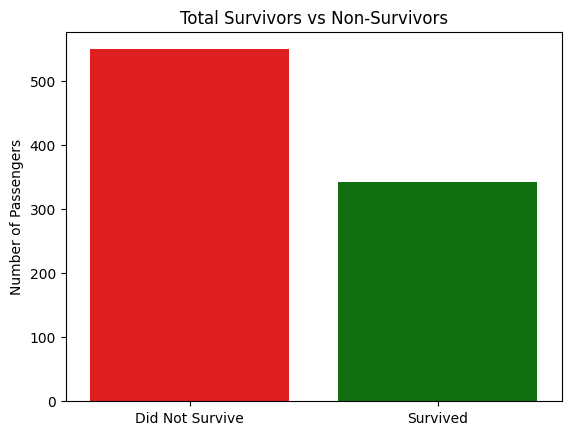

In [6]:
# Count plot of Survived and non-Survived passengers
sns.countplot(x=train['Survived'].astype(str), 
              hue=train['Survived'].astype(str), 
              data=train,
              palette={'0': 'red', '1': 'green'})

plt.title('Total Survivors vs Non-Survivors')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])  
plt.xlabel('') 
plt.ylabel('Number of Passengers')
plt.show()

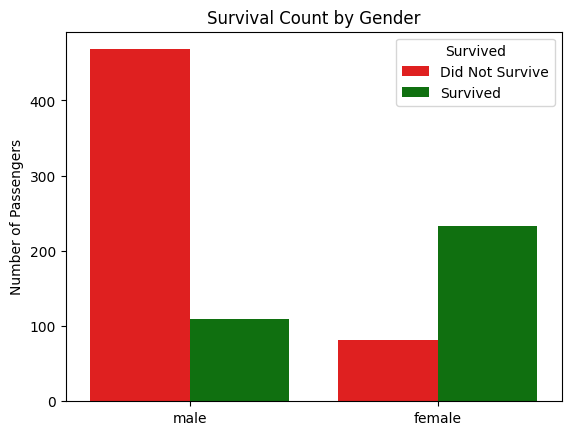

In [7]:
# Count plot of Survived and non-Survived based on gender
sns.countplot(x='Sex', 
              hue=train['Survived'].astype(str), 
              data=train, 
              palette={'0': 'red', '1': 'green'},)

plt.title('Survival Count by Gender')
plt.xlabel('') 
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

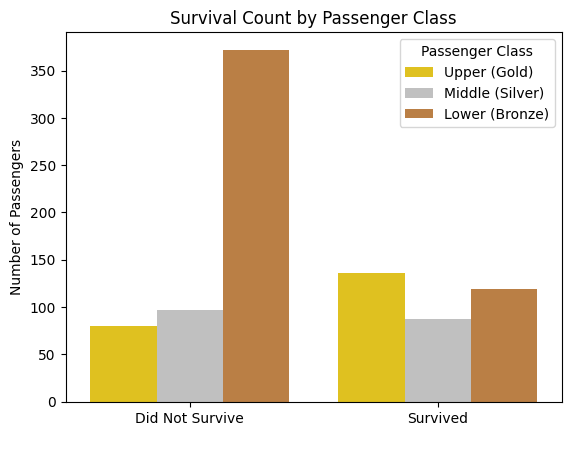

In [8]:
# Count plot of Survived and non-Survived based on passenger class
sns.countplot(
    x=train['Survived'].astype(str),
    hue=train['Pclass'],
    data=train,
    palette={1: '#FFD700', 2: '#C0C0C0', 3: '#CD7F32'}  # Gold, Silver, Bronze
)

plt.title('Survival Count by Passenger Class')
plt.xlabel(' ')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])  
plt.legend(title='Passenger Class', labels=['Upper (Gold)', 'Middle (Silver)', 'Lower (Bronze)']) 
plt.show()

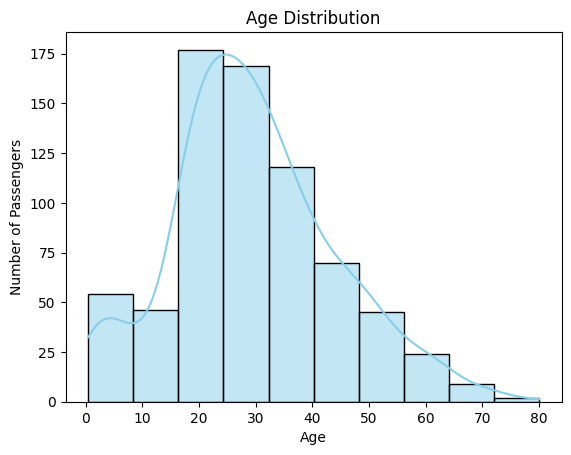

In [9]:
# Plot histogram 
sns.histplot(data=train, x='Age', kde=True, color='skyblue', bins=10)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

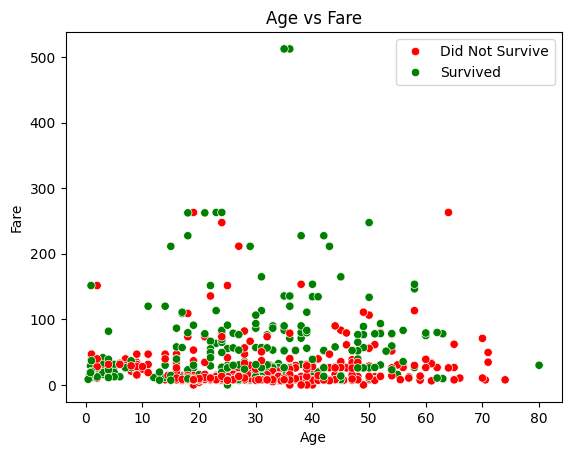

In [10]:
# Create a temporary column with survival labels
train['Survived_Label'] = train['Survived'].replace({0: 'Did Not Survive', 1: 'Survived'})

# Scatter plot of Age vs Fare 
sns.scatterplot(x='Age', y='Fare',
                hue='Survived_Label',
                data=train,
                palette={'Did Not Survive': 'red', 'Survived': 'green'})

plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend() 
plt.show()